In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import random
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
train_data = pd.read_csv('./input/handouts_fhs.csv')
train_data_copy = train_data.copy(deep = True)

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = train_data_copy.shape[0]

print (train_data_copy.info())
train_data_copy.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 75 columns):
randid       4434 non-null int64
death        4434 non-null object
angina       4434 non-null object
hospmi       4434 non-null object
mi_fchd      4434 non-null object
anychd       4434 non-null object
stroke       4434 non-null object
cvd          4434 non-null object
hyperten     4434 non-null object
timeap       4434 non-null float64
timemi       4434 non-null float64
timemifc     4434 non-null float64
timechd      4434 non-null float64
timestrk     4434 non-null float64
timecvd      4434 non-null float64
timedth      4434 non-null float64
timehyp      4434 non-null float64
sex1         4434 non-null object
totchol1     4382 non-null float64
age1         4434 non-null int64
sysbp1       4434 non-null float64
diabp1       4434 non-null float64
cursmoke1    4434 non-null object
cigpday1     4402 non-null float64
bmi1         4415 non-null float64
diabetes1    4434 non-null objec

,randid,death,angina,hospmi,mi_fchd,anychd,stroke,cvd,hyperten,timeap,timemi,timemifc,timechd,timestrk,timecvd,timedth,timehyp,sex1,totchol1,age1,sysbp1,diabp1,cursmoke1,cigpday1,bmi1,diabetes1,bpmeds1,heartrte1,glucose1,prevchd1,prevap1,prevmi1,prevstrk1,prevhyp1,hdlc1,ldlc1,sex2,totchol2,age2,sysbp2,diabp2,cursmoke2,cigpday2,bmi2,diabetes2,bpmeds2,heartrte2,glucose2,prevchd2,prevap2,prevmi2,prevstrk2,prevhyp2,hdlc2,ldlc2,sex3,totchol3,age3,sysbp3,diabp3,cursmoke3,cigpday3,bmi3,diabetes3,bpmeds3,heartrte3,glucose3,prevchd3,prevap3,prevmi3,prevstrk3,prevhyp3,hdlc3,ldlc3,bmidiff
3152,7135704,Yes,No,No,Yes,Yes,No,Yes,Yes,21.270363,21.270363,15.337440,15.337440,21.270363,15.337440,21.270363,2.261465,Female,273.0,49,147.0,89.0,Yes,20.0,24.26,No,No,85.0,62.0,No,No,No,No,No,NaN,NaN,Female,238.0,55.0,146.0,90.0,Yes,20.0,23.48,No,No,85.0,NaN,No,No,No,No,Yes,NaN,NaN,Female,NaN,61.0,145.0,74.0,Yes,20.0,19.09,No,No,97.0,83.0,No,No,No,No,Yes,NaN,NaN,0.78
2750,6223560,Yes,No,No,No,No,No,No,No,7.329227,7.329227,7.329227,7.329227,7.329227,7.329226,7.329227,7.329227,Female,211.0,48,130.0,73.0,Yes,20.0,19.72,No,No,82.0,NaN,No,No,No,No,No,NaN,NaN,Female,174.0,54.0,112.5,70.0,Yes,7.0,15.96,No,No,70.0,80.0,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.76
958,2098000,Yes,No,Yes,Yes,Yes,No,Yes,Yes,22.436687,20.167009,20.167009,20.167009,22.436687,20.167009,22.436687,0.000000,Female,318.0,62,206.0,98.0,No,0.0,27.23,No,No,84.0,87.0,No,No,No,No,Yes,NaN,NaN,Female,312.0,68.0,175.0,85.0,No,0.0,27.42,No,No,85.0,76.0,No,No,No,No,Yes,NaN,NaN,Female,252.0,74.0,187.5,90.0,No,0.0,26.86,No,No,90.0,108.0,No,No,No,No,Yes,48.0,204.0,-0.19
1157,2581913,No,No,No,No,No,No,No,Yes,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.058864,Female,241.0,63,143.5,89.0,No,0.0,26.45,No,No,69.0,80.0,No,No,No,No,No,NaN,NaN,Female,263.0,69.0,143.0,78.0,No,0.0,26.49,No,No,70.0,93.0,No,No,No,No,Yes,NaN,NaN,Female,221.0,75.0,147.0,70.0,No,0.0,31.99,No,No,70.0,86.0,No,No,No,No,Yes,55.0,147.0,-0.04
4304,9674054,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,11.958932,11.707050,11.707050,11.707050,15.819302,11.707050,15.819302,9.984942,Male,213.0,40,149.0,83.0,No,0.0,26.68,No,No,69.0,94.0,No,No,No,No,No,NaN,NaN,Male,246.0,46.0,133.0,79.0,No,0.0,26.88,No,No,75.0,90.0,No,No,No,No,No,NaN,NaN,Male,206.0,52.0,129.0,80.0,No,0.0,23.72,No,No,72.0,108.0,Yes,Yes,Yes,No,Yes,36.0,144.0,-0.20
2006,4494395,No,No,No,No,No,Yes,Yes,Yes,24.000000,24.000000,24.000000,24.000000,22.294319,22.294319,24.000000,2.078029,Male,215.0,51,147.0,96.0,No,0.0,28.59,No,No,65.0,100.0,No,No,No,No,No,NaN,NaN,Male,243.0,56.0,176.0,100.0,No,0.0,28.30,Yes,No,60.0,134.0,No,No,No,No,Yes,NaN,NaN,Male,186.0,63.0,188.0,84.5,No,0.0,28.01,Yes,No,70.0,84.0,No,No,No,No,Yes,27.0,159.0,0.29
3520,7912905,No,No,No,No,No,No,No,No,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,Female,231.0,47,102.5,66.0,No,0.0,23.40,No,No,70.0,78.0,No,No,No,No,No,NaN,NaN,Female,276.0,53.0,123.0,81.0,No,0.0,23.58,No,No,70.0,57.0,No,No,No,No,No,NaN,NaN,Female,243.0,59.0,105.0,69.0,No,0.0,21.67,No,No,70.0,60.0,No,No,No,No,No,57.0,186.0,-0.18
1554,3444682,No,No,No,No,No,No,No,Yes,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,4.131417,Female,306.0,57,135.0,88.0,No,0.0,28.36,No,No,80.0,70.0,No,No,No,No,No,NaN,NaN,Female,296.0,63.0,158.5,87.0,No,0.0,28.00,No,No,83.0,79.0,No,No,No,No,Yes,NaN,NaN,Female,253.0,69.0,134.0,84.0,No,0.0,31.09,No,NaN,85.0,78.0,No,No,No,No,Yes,46.0,157.0,0.36
3215,7231853,Yes,No,No,No,No,No,No,Yes,3.323751,3.323751,3.323751,3.323751,3.323751,3.323751,3.323751,0.000000,Female,177.0,51,141.0,92.0,No,0.0,29.64,No,No,72.0,130.0,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
918,2005642,No,No,No,No,Yes,No,Yes,Yes,24.000000,24.000000,24.000000,10.970568,24.000000,10.970568,24.000000,0.000000,Mal

In [4]:
print('Train columns with missing values:\n', train_data_copy.isnull().sum())
train_data_copy.describe(include = 'all')

Train columns with missing values:
 randid          0
death           0
angina          0
hospmi          0
mi_fchd         0
anychd          0
stroke          0
cvd             0
hyperten        0
timeap          0
timemi          0
timemifc        0
timechd         0
timestrk        0
timecvd         0
timedth         0
timehyp         0
sex1            0
totchol1       52
age1            0
sysbp1          0
diabp1          0
cursmoke1       0
cigpday1       32
bmi1           19
diabetes1       0
bpmeds1        61
heartrte1       1
glucose1      397
prevchd1        0
prevap1         0
prevmi1         0
prevstrk1       0
prevhyp1        0
hdlc1        4434
ldlc1        4434
sex2          504
totchol2      647
age2          504
sysbp2        504
diabp2        504
cursmoke2     504
cigpday2      537
bmi2          520
diabetes2     504
bpmeds2       590
heartrte2     505
glucose2      985
prevchd2      504
prevap2       504
prevmi2       504
prevstrk2     504
prevhyp2      504
hdlc2     

,randid,death,angina,hospmi,mi_fchd,anychd,stroke,cvd,hyperten,timeap,timemi,timemifc,timechd,timestrk,timecvd,timedth,timehyp,sex1,totchol1,age1,sysbp1,diabp1,cursmoke1,cigpday1,bmi1,diabetes1,bpmeds1,heartrte1,glucose1,prevchd1,prevap1,prevmi1,prevstrk1,prevhyp1,hdlc1,ldlc1,sex2,totchol2,age2,sysbp2,diabp2,cursmoke2,cigpday2,bmi2,diabetes2,bpmeds2,heartrte2,glucose2,prevchd2,prevap2,prevmi2,prevstrk2,prevhyp2,hdlc2,ldlc2,sex3,totchol3,age3,sysbp3,diabp3,cursmoke3,cigpday3,bmi3,diabetes3,bpmeds3,heartrte3,glucose3,prevchd3,prevap3,prevmi3,prevstrk3,prevhyp3,hdlc3,ldlc3,bmidiff
count,4.434000e+03,4434,4434,4434,4434,4434,4434,4434,4434,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434,4382.000000,4434.000000,4434.000000,4434.000000,4434,4402.000000,4415.000000,4434,4373,4433.000000,4037.000000,4434,4434,4434,4434,4434,0.0,0.0,3930,3787.000000,3930.000000,3930.000000,3930.000000,3930,3897.000000,3914.000000,3930,3844,3929.000000,3449.000000,3930,3930,3930,3930,3930,0.0,0.0,3263,3049.000000,3263.000000,3263.000000,3263.000000,3263,3249.000000,3246.000000,3263,2817,3259.000000,2701.000000,3263,3263,3263,3263,3263,3027.000000,3026.000000,3909.000000
unique,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,2,2,2,2,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,2,2,2,2,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN
top,NaN,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,No,NaN,NaN,No,No,NaN,NaN,No,No,No,No,No,NaN,NaN,Female,NaN,NaN,NaN,NaN,No,NaN,NaN,No,No,NaN,NaN,No,No,No,No,No,NaN,NaN,Female,NaN,NaN,NaN,NaN,No,NaN,NaN,No,No,NaN,NaN,No,No,No,No,Yes,NaN,NaN,NaN
freq,NaN,2884,3709,3980,3703,3194,4019,3277,3252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2490,NaN,NaN,NaN,NaN,2253,NaN,NaN,4313,4229,NaN,NaN,4240,4287,4348,4402,3004,NaN,NaN,2239,NaN,NaN,NaN,NaN,2203,NaN,NaN,3775,3473,NaN,NaN,3642,3710,3800,3879,1971,NaN,NaN,1876,NaN,NaN,NaN,NaN,2142,NaN,NaN,3009,2388,NaN,NaN,2903,3003,3105,3194,1955,NaN,NaN,NaN
mean,4.987278e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.895142,19.822875,19.673326,18.251050,19.998994,18.666524,20.549296,9.407827,NaN,236.984254,49.925801,132.907758,83.083559,NaN,8.966379,25.846161,NaN,NaN,75.891044,82.185782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.579086,55.422392,136.947455,84.019593,NaN,8.674365,25.898071,NaN,NaN,77.308221,81.969556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.713349,60.648177,140.215752,81.792982,NaN,6.771622,25.894781,NaN,NaN,77.357778,89.775268,NaN,NaN,NaN,NaN,NaN,49.364718,176.466953,-0.067831
std,2.903549e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.527016,6.799272,6.929463,7.881781,6.538912,7.677798,6.061496,9.450091,NaN,44.651098,8.676929,22.421597,12.055999,NaN,11.931706,4.101821,NaN,NaN,12.113635,24.399582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.754129,8.542780,22.544229,11.427285,NaN,12.807449,4.122530,NaN,NaN,12.771290,22.217339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.449481,8.296766,22.927642,11.271432,NaN,11.629631,4.080655,NaN,NaN,12.490350,28.158865,NaN,NaN,NaN,NaN,NaN,15.626669,46.863393,1.801516
min,2.448000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071184,0.000000,NaN,107.000000,32.000000,83.500000,48.000000,NaN,0.000000,15.540000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,39.000000,88.000000,47.000000,NaN,0.000000,15.330000,NaN,NaN,42.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.000000,44.000000,86.000000,30.000000,NaN,0.000000,14.430000,NaN,NaN,37.000000,46.000000,NaN,NaN,NaN,NaN,NaN,10.000000,20.000000,-10.430000
25%,2.440336e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.642026,17.041752,16.585900,13.052019,17.370979,14.086927,19.094456,0.000000,NaN,206.000000,42.000000,117.500000,75.000000,NaN,0.000000,23.090000,NaN,NaN,68.000000,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.000000,48.000000,120.625000,77.000000,NaN,0.000000,23.090000,NaN,NaN,70.000000,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
missing_quantitative_vars = ['totchol1', 'cigpday1', 'bmi1', 'heartrte1', 'glucose1', 'totchol2', 'age2', 'sysbp2', 'diabp2', 'cigpday2', 'bmi2', 'heartrte2', 'glucose2', 'totchol3', 'age3', 'sysbp3', 'diabp3', 'cigpday3', 'bmi3', 'heartrte3', 'glucose3', 'hdlc3', 'ldlc3', 'bmidiff']
for var in missing_quantitative_vars:
  train_data_copy[var].fillna(train_data_copy[var].median(), inplace = True)

missing_qualitative_vars = ['bpmeds1', 'sex2', 'cursmoke2', 'diabetes2', 'bpmeds2', 'prevchd2', 'prevap2', 'prevmi2', 'prevstrk2', 'prevhyp2', 'sex3', 'cursmoke3', 'diabetes3', 'bpmeds3', 'prevchd3', 'prevap3', 'prevmi3', 'prevstrk3', 'prevhyp3']
for var in missing_qualitative_vars:
  train_data_copy[var].fillna(train_data_copy[var].mode()[0], inplace = True)

train_data_copy = train_data_copy.drop(['randid', 'hdlc1', 'ldlc1', 'hdlc2', 'ldlc2'], axis = 1)

print(train_data_copy.isnull().sum())

death        0
angina       0
hospmi       0
mi_fchd      0
anychd       0
stroke       0
cvd          0
hyperten     0
timeap       0
timemi       0
timemifc     0
timechd      0
timestrk     0
timecvd      0
timedth      0
timehyp      0
sex1         0
totchol1     0
age1         0
sysbp1       0
diabp1       0
cursmoke1    0
cigpday1     0
bmi1         0
diabetes1    0
bpmeds1      0
heartrte1    0
glucose1     0
prevchd1     0
prevap1      0
prevmi1      0
prevstrk1    0
prevhyp1     0
sex2         0
totchol2     0
age2         0
sysbp2       0
diabp2       0
cursmoke2    0
cigpday2     0
bmi2         0
diabetes2    0
bpmeds2      0
heartrte2    0
glucose2     0
prevchd2     0
prevap2      0
prevmi2      0
prevstrk2    0
prevhyp2     0
sex3         0
totchol3     0
age3         0
sysbp3       0
diabp3       0
cursmoke3    0
cigpday3     0
bmi3         0
diabetes3    0
bpmeds3      0
heartrte3    0
glucose3     0
prevchd3     0
prevap3      0
prevmi3      0
prevstrk3    0
prevhyp3  

In [6]:
for num_var in train_data_copy:
    if (train_data_copy[num_var].name[:4] == 'time'):
        train_data_copy[num_var + 'Bin'] = pd.cut(train_data_copy[num_var], 12)
    elif (train_data_copy[num_var].dtype == 'float64' or train_data_copy[num_var].dtype == 'int64'):
        train_data_copy[num_var + 'Bin'] = pd.cut(train_data_copy[num_var], 6)
    
label = LabelEncoder()
for col in train_data_copy:
    if (train_data_copy[col].dtype.name == 'object' or train_data_copy[col].dtype.name == 'category'):
        categorical_code = train_data_copy[col].name + '_code'
        train_data_copy[categorical_code] = label.fit_transform(train_data_copy[col])

### if you wanna fail at life xddddd
#train_data_copy['ProbableHeartDisease'] = 0
#train_data_copy['ProbableHeartDisease'].loc[(train_data_copy['prevchd1'] == 1) |
#                                            (train_data_copy['mi_fchd'] == 1) |
#                                            (train_data_copy['anychd'] == 1) |
#                                            (train_data_copy['cvd'] == 1)] = 1



train_data_copy.info()
train_data_copy.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Columns: 175 entries, death to bmidiffBin_code
dtypes: category(35), float64(34), int64(71), object(35)
memory usage: 4.9+ MB


,death,angina,hospmi,mi_fchd,anychd,stroke,cvd,hyperten,timeap,timemi,timemifc,timechd,timestrk,timecvd,timedth,timehyp,sex1,totchol1,age1,sysbp1,diabp1,cursmoke1,cigpday1,bmi1,diabetes1,bpmeds1,heartrte1,glucose1,prevchd1,prevap1,prevmi1,prevstrk1,prevhyp1,sex2,totchol2,age2,sysbp2,diabp2,cursmoke2,cigpday2,bmi2,diabetes2,bpmeds2,heartrte2,glucose2,prevchd2,prevap2,prevmi2,prevstrk2,prevhyp2,sex3,totchol3,age3,sysbp3,diabp3,cursmoke3,cigpday3,bmi3,diabetes3,bpmeds3,heartrte3,glucose3,prevchd3,prevap3,prevmi3,prevstrk3,prevhyp3,hdlc3,ldlc3,bmidiff,timeapBin,timemiBin,timemifcBin,timechdBin,timestrkBin,timecvdBin,timedthBin,timehypBin,totchol1Bin,age1Bin,sysbp1Bin,diabp1Bin,cigpday1Bin,bmi1Bin,heartrte1Bin,glucose1Bin,totchol2Bin,age2Bin,sysbp2Bin,diabp2Bin,cigpday2Bin,bmi2Bin,heartrte2Bin,glucose2Bin,totchol3Bin,age3Bin,sysbp3Bin,diabp3Bin,cigpday3Bin,bmi3Bin,heartrte3Bin,glucose3Bin,hdlc3Bin,ldlc3Bin,bmidiffBin,death_code,angina_code,hospmi_code,mi_fchd_code,anychd_code,stroke_code,cvd_code,hyperten_code,sex1_code,cursmoke1_code,diabetes1_code,bpmeds1_code,prevchd1_code,prevap1_code,prevmi1_code,prevstrk1_code,prevhyp1_code,sex2_code,cursmoke2_code,diabetes2_code,bpmeds2_code,prevchd2_code,prevap2_code,prevmi2_code,prevstrk2_code,prevhyp2_code,sex3_code,cursmoke3_code,diabetes3_code,bpmeds3_code,prevchd3_code,prevap3_code,prevmi3_code,prevstrk3_code,prevhyp3_code,timeapBin_code,timemiBin_code,timemifcBin_code,timechdBin_code,timestrkBin_code,timecvdBin_code,timedthBin_code,timehypBin_code,totchol1Bin_code,age1Bin_code,sysbp1Bin_code,diabp1Bin_code,cigpday1Bin_code,bmi1Bin_code,heartrte1Bin_code,glucose1Bin_code,totchol2Bin_code,age2Bin_code,sysbp2Bin_code,diabp2Bin_code,cigpday2Bin_code,bmi2Bin_code,heartrte2Bin_code,glucose2Bin_code,totchol3Bin_code,age3Bin_code,sysbp3Bin_code,diabp3Bin_code,cigpday3Bin_code,bmi3Bin_code,heartrte3Bin_code,glucose3Bin_code,hdlc3Bin_code,ldlc3Bin_code,bmidiffBin_code
2051,No,No,No,No,No,No,No,Yes,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,11.947981,Female,229.0,48,111.0,85.0,Yes,15.0,24.10,No,No,75.0,74.0,No,No,No,No,No,Female,243.0,54.0,121.0,79.0,Yes,14.0,23.74,No,No,95.0,77.0,No,No,No,No,No,Female,208.0,60.0,130.0,90.0,Yes,15.0,33.54,No,No,90.0,68.0,No,No,No,No,Yes,36.0,150.0,0.36,"(22.0, 24.0]","(22.0, 24.0]","(22.0, 24.0]","(22.0, 24.0]","(22.0, 24.0]","(22.0, 24.0]","(22.006, 24.0]","(10.0, 12.0]","(205.167, 303.333]","(44.667, 51.0]","(83.288, 118.75]","(79.5, 95.25]","(11.667, 23.333]","(22.417, 29.293]","(60.5, 77.0]","(39.646, 99.0]","(202.167, 289.333]","(51.333, 57.5]","(120.333, 152.667]","(64.167, 81.333]","(-0.09, 15.0]","(22.242, 29.153]","(71.667, 101.333]","(38.619, 102.5]","(197.5, 283.0]","(56.333, 62.5]","(116.167, 146.333]","(80.0, 96.667]","(13.333, 26.667]","(28.553, 35.615]","(74.667, 93.5]","(45.568, 118.0]","(9.821, 39.833]","(110.833, 201.667]","(0.035, 3.523]",0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,11,11,11,11,11,11,11,5,1,2,0,2,1,1,1,0,1,2,1,1,0,1,1,0,1,2,1,3,1,2,2,0,0,1,3
2600,Yes,Yes,No,No,Yes,Yes,Yes,Yes,9.070500,19.288159,19.288159,9.070500,19.288159,9.070499,19.288159,8.123203,Male,252.0,59,146.0,92.0,No,0.0,27.88,No,No,68.0,80.0,No,No,No,No,No,Male,259.0,65.0,119.0,78.0,No,0.0,26.77,No,No,60.0,81.0,No,No,No,No,No,Male,226.0,71.0,150.0,90.0,No,0.0,25.97,No,No,60.0,68.0,Yes,Yes,No,No,Yes,34.0,192.0,1.11,"(8.0, 10.0]","(18.0, 20.0]","(18.0, 20.0]","(8.0, 10.0]","(18.0, 20.0]","(8.0, 10.0]","(18.018, 20.012]","(8.0, 10.0]","(205.167, 303.333]","(57.333, 63.667]","(118.75, 154.0]","(79.5, 95.25]","(-0.07, 11.667]","(22.417, 29.293]","(60.5, 77.0]","(39.646, 99.0]","(202.167, 289.333]","(63.667, 69.833]","(87.806, 120.333]","(64.167, 81.333]","(-0.09, 15.0]","(22.242, 29.153]","(41.822, 71.667]","(38.619, 102.5]","(197.5, 283.0]","(68.667, 74.833]","(146.333, 176.5]","(80.0, 96.667]","(-0.08, 13.333]","(21.492, 28.553]","(55.833, 74.667]","(45.568, 118.0]","(9.821, 39.833]","(110.833, 201.667]","(0.035, 3.5

In [7]:
print('Train columns with null values:\n', train_data_copy.isnull().sum())
print('-'*10)
print(train_data_copy.info())

Train columns with null values:
 death                0
angina               0
hospmi               0
mi_fchd              0
anychd               0
stroke               0
cvd                  0
hyperten             0
timeap               0
timemi               0
timemifc             0
timechd              0
timestrk             0
timecvd              0
timedth              0
timehyp              0
sex1                 0
totchol1             0
age1                 0
sysbp1               0
diabp1               0
cursmoke1            0
cigpday1             0
bmi1                 0
diabetes1            0
bpmeds1              0
heartrte1            0
glucose1             0
prevchd1             0
prevap1              0
prevmi1              0
prevstrk1            0
prevhyp1             0
sex2                 0
totchol2             0
age2                 0
sysbp2               0
diabp2               0
cursmoke2            0
cigpday2             0
bmi2                 0
diabetes2            0
b

In [8]:
Target = ['anychd_code']

train_data_copy_x = []
for i in range(len(train_data_copy.columns)): # original vars
    colName = train_data_copy.columns[i]
    if (colName[len(colName)-1-4:len(colName)] != '_code' and 
        train_data_copy[colName].dtype.name != 'category' and
        colName != 'anychd_code'):
        train_data_copy_x.append(colName)
        
train_data_copy_x_calc = []
for i in range(len(train_data_copy.columns)): # numerical and _code variables
    colName = train_data_copy.columns[i]
    if (train_data_copy[colName].dtype != 'object' and 
        train_data_copy[colName].dtype.name != 'category' and
        colName[len(colName)-1-7:len(colName)] != 'Bin_code' and
        colName != 'anychd_code'):
        train_data_copy_x_calc.append(colName)

train_data_copy_xy = Target + train_data_copy_x
print ('Original X Y: ', train_data_copy_xy, '\n')

train_data_copy_x_bin = []
for i in range(len(train_data_copy.columns)): # numerical, _code, and Bin_code variables
    colName = train_data_copy.columns[i]
    if (train_data_copy[colName].dtype != 'object' and 
        train_data_copy[colName].dtype.name != 'category' and
        colName != 'anychd_code'):
        train_data_copy_x_bin.append(colName)

train_data_copy_xy_bin = Target + train_data_copy_x_bin
print ('Bin X Y: ', train_data_copy_xy_bin, '\n')

train_data_copy_dummy = pd.get_dummies(train_data_copy[train_data_copy_x])
train_data_copy_x_dummy = train_data_copy_dummy.columns.tolist()
train_data_copy_xy_dummy = Target + train_data_copy_x_dummy
print ('Dummy X Y: ', train_data_copy_xy_dummy, '\n')

train_data_copy_dummy.head()

Original X Y:  ['anychd_code', 'death', 'angina', 'hospmi', 'mi_fchd', 'anychd', 'stroke', 'cvd', 'hyperten', 'timeap', 'timemi', 'timemifc', 'timechd', 'timestrk', 'timecvd', 'timedth', 'timehyp', 'sex1', 'totchol1', 'age1', 'sysbp1', 'diabp1', 'cursmoke1', 'cigpday1', 'bmi1', 'diabetes1', 'bpmeds1', 'heartrte1', 'glucose1', 'prevchd1', 'prevap1', 'prevmi1', 'prevstrk1', 'prevhyp1', 'sex2', 'totchol2', 'age2', 'sysbp2', 'diabp2', 'cursmoke2', 'cigpday2', 'bmi2', 'diabetes2', 'bpmeds2', 'heartrte2', 'glucose2', 'prevchd2', 'prevap2', 'prevmi2', 'prevstrk2', 'prevhyp2', 'sex3', 'totchol3', 'age3', 'sysbp3', 'diabp3', 'cursmoke3', 'cigpday3', 'bmi3', 'diabetes3', 'bpmeds3', 'heartrte3', 'glucose3', 'prevchd3', 'prevap3', 'prevmi3', 'prevstrk3', 'prevhyp3', 'hdlc3', 'ldlc3', 'bmidiff'] 

Bin X Y:  ['anychd_code', 'timeap', 'timemi', 'timemifc', 'timechd', 'timestrk', 'timecvd', 'timedth', 'timehyp', 'totchol1', 'age1', 'sysbp1', 'diabp1', 'cigpday1', 'bmi1', 'heartrte1', 'glucose1', 'totc

,timeap,timemi,timemifc,timechd,timestrk,timecvd,timedth,timehyp,totchol1,age1,sysbp1,diabp1,cigpday1,bmi1,heartrte1,glucose1,totchol2,age2,sysbp2,diabp2,cigpday2,bmi2,heartrte2,glucose2,totchol3,age3,sysbp3,diabp3,cigpday3,bmi3,heartrte3,glucose3,hdlc3,ldlc3,bmidiff,death_No,death_Yes,angina_No,angina_Yes,hospmi_No,hospmi_Yes,mi_fchd_No,mi_fchd_Yes,anychd_No,anychd_Yes,stroke_No,stroke_Yes,cvd_No,cvd_Yes,hyperten_No,hyperten_Yes,sex1_Female,sex1_Male,cursmoke1_No,cursmoke1_Yes,diabetes1_No,diabetes1_Yes,bpmeds1_No,bpmeds1_Yes,prevchd1_No,prevchd1_Yes,prevap1_No,prevap1_Yes,prevmi1_No,prevmi1_Yes,prevstrk1_No,prevstrk1_Yes,prevhyp1_No,prevhyp1_Yes,sex2_Female,sex2_Male,cursmoke2_No,cursmoke2_Yes,diabetes2_No,diabetes2_Yes,bpmeds2_No,bpmeds2_Yes,prevchd2_No,prevchd2_Yes,prevap2_No,prevap2_Yes,prevmi2_No,prevmi2_Yes,prevstrk2_No,prevstrk2_Yes,prevhyp2_No,prevhyp2_Yes,sex3_Female,sex3_Male,cursmoke3_No,cursmoke3_Yes,diabetes3_No,diabetes3_Yes,bpmeds3_No,bpmeds3_Yes,prevchd3_No,prevchd3_Yes,prevap3_No,prevap3_Yes,prevmi3_No,prevmi3_Yes,prevstrk3_No,prevstrk3_Yes,prevhyp3_No,prevhyp3_Yes
0,24.000000,17.626283,17.626283,17.626283,24.00000,17.626284,24.000000,24.000000,195.0,39,106.0,70.0,0.0,26.97,80.0,77.0,246.0,55.0,133.0,83.0,0.0,25.50,75.0,78.0,209.0,52.0,121.0,66.0,0.0,25.46,69.0,92.0,31.0,178.0,-0.15,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,250.0,46,121.0,81.0,0.0,28.73,95.0,76.0,260.0,52.0,105.0,69.5,0.0,29.43,80.0,86.0,237.0,58.0,108.0,66.0,0.0,28.50,80.0,71.0,54.0,141.0,-0.70,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,245.0,48,127.5,80.0,20.0,25.34,75.0,70.0,283.0,54.0,141.0,89.0,30.0,25.34,75.0,87.0,234.0,60.0,137.0,80.0,0.0,25.46,76.0,84.0,48.0,173.0,0.00,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
3,8.093087,8.093087,8.093087,8.093087,5.71937,5.719370,8.093087,0.000000,225.0,61,150.0,95.0,30.0,28.58,65.0,103.0,232.0,67.0,183.0,109.0,20.0,30.18,60.0,89.0,234.0,60.0,137.0,80.0,0.0,25.46,76.0,84.0,48.0,173.0,-1.60,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
4,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,11.731691,285.0,46,130.0,84.0,23.0,23.10,85.0,85.0,343.0,51.0,109.0,77.0,30.0,23.48,90.0,72.0,234.0,58.0,155.0,90.0,30.0,24.61,74.0,84.0,48.0,173.0,-0.38,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1


In [9]:
print('Train columns with null values: \n', train_data_copy.isnull().sum())
print("-"*10)
print (train_data_copy.info())
print("-"*10)

train_data_copy.describe(include = 'all')

Train columns with null values: 
 death                0
angina               0
hospmi               0
mi_fchd              0
anychd               0
stroke               0
cvd                  0
hyperten             0
timeap               0
timemi               0
timemifc             0
timechd              0
timestrk             0
timecvd              0
timedth              0
timehyp              0
sex1                 0
totchol1             0
age1                 0
sysbp1               0
diabp1               0
cursmoke1            0
cigpday1             0
bmi1                 0
diabetes1            0
bpmeds1              0
heartrte1            0
glucose1             0
prevchd1             0
prevap1              0
prevmi1              0
prevstrk1            0
prevhyp1             0
sex2                 0
totchol2             0
age2                 0
sysbp2               0
diabp2               0
cursmoke2            0
cigpday2             0
bmi2                 0
diabetes2            0


,death,angina,hospmi,mi_fchd,anychd,stroke,cvd,hyperten,timeap,timemi,timemifc,timechd,timestrk,timecvd,timedth,timehyp,sex1,totchol1,age1,sysbp1,diabp1,cursmoke1,cigpday1,bmi1,diabetes1,bpmeds1,heartrte1,glucose1,prevchd1,prevap1,prevmi1,prevstrk1,prevhyp1,sex2,totchol2,age2,sysbp2,diabp2,cursmoke2,cigpday2,bmi2,diabetes2,bpmeds2,heartrte2,glucose2,prevchd2,prevap2,prevmi2,prevstrk2,prevhyp2,sex3,totchol3,age3,sysbp3,diabp3,cursmoke3,cigpday3,bmi3,diabetes3,bpmeds3,heartrte3,glucose3,prevchd3,prevap3,prevmi3,prevstrk3,prevhyp3,hdlc3,ldlc3,bmidiff,timeapBin,timemiBin,timemifcBin,timechdBin,timestrkBin,timecvdBin,timedthBin,timehypBin,totchol1Bin,age1Bin,sysbp1Bin,diabp1Bin,cigpday1Bin,bmi1Bin,heartrte1Bin,glucose1Bin,totchol2Bin,age2Bin,sysbp2Bin,diabp2Bin,cigpday2Bin,bmi2Bin,heartrte2Bin,glucose2Bin,totchol3Bin,age3Bin,sysbp3Bin,diabp3Bin,cigpday3Bin,bmi3Bin,heartrte3Bin,glucose3Bin,hdlc3Bin,ldlc3Bin,bmidiffBin,death_code,angina_code,hospmi_code,mi_fchd_code,anychd_code,stroke_code,cvd_code,hyperten_code,sex1_code,cursmoke1_code,diabetes1_code,bpmeds1_code,prevchd1_code,prevap1_code,prevmi1_code,prevstrk1_code,prevhyp1_code,sex2_code,cursmoke2_code,diabetes2_code,bpmeds2_code,prevchd2_code,prevap2_code,prevmi2_code,prevstrk2_code,prevhyp2_code,sex3_code,cursmoke3_code,diabetes3_code,bpmeds3_code,prevchd3_code,prevap3_code,prevmi3_code,prevstrk3_code,prevhyp3_code,timeapBin_code,timemiBin_code,timemifcBin_code,timechdBin_code,timestrkBin_code,timecvdBin_code,timedthBin_code,timehypBin_code,totchol1Bin_code,age1Bin_code,sysbp1Bin_code,diabp1Bin_code,cigpday1Bin_code,bmi1Bin_code,heartrte1Bin_code,glucose1Bin_code,totchol2Bin_code,age2Bin_code,sysbp2Bin_code,diabp2Bin_code,cigpday2Bin_code,bmi2Bin_code,heartrte2Bin_code,glucose2Bin_code,totchol3Bin_code,age3Bin_code,sysbp3Bin_code,diabp3Bin_code,cigpday3Bin_code,bmi3Bin_code,heartrte3Bin_code,glucose3Bin_code,hdlc3Bin_code,ldlc3Bin_code,bmidiffBin_code
count,4434,4434,4434,4434,4434,4434,4434,4434,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434,4434.000000,4434.000000,4434.000000,4434.000000,4434,4434.000000,4434.000000,4434,4434,4434.000000,4434.000000,4434,4434,4434,4434,4434,4434,4434.000000,4434.000000,4434.000000,4434.000000,4434,4434.000000,4434.000000,4434,4434,4434.000000,4434.000000,4434,4434,4434,4434,4434,4434,4434.000000,4434.000000,4434.000000,4434.000000,4434,4434.000000,4434.000000,4434,4434,4434.000000,4434.000000,4434,4434,4434,4434,4434,4434.000000,4434.000000,4434.000000,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.00000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.00000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000
unique,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,2,2,2,2,2,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,2,2,2,2,2,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,12,12,12,12,12,12,12,12,5,6,6,6,6,6,6,6,6,6,6,6,6,6,5,6,6,6,6,6,6,6,6,6,6,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [10]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(train_data_copy[train_data_copy_x_calc], train_data_copy[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(train_data_copy[train_data_copy_x_bin], train_data_copy[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(train_data_copy_dummy[train_data_copy_x_dummy], train_data_copy[Target], random_state = 0)


print("train_data_copy Shape: {}".format(train_data_copy.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

train_data_copy Shape: (4434, 175)
Train1 Shape: (3325, 69)
Test1 Shape: (1109, 69)


,timeap,timemi,timemifc,timechd,timestrk,timecvd,timedth,timehyp,totchol1,age1,sysbp1,diabp1,cigpday1,bmi1,heartrte1,glucose1,totchol2,age2,sysbp2,diabp2,cigpday2,bmi2,heartrte2,glucose2,totchol3,age3,sysbp3,diabp3,cigpday3,bmi3,heartrte3,glucose3,hdlc3,ldlc3,bmidiff,death_code,angina_code,hospmi_code,mi_fchd_code,stroke_code,cvd_code,hyperten_code,sex1_code,cursmoke1_code,diabetes1_code,bpmeds1_code,prevchd1_code,prevap1_code,prevmi1_code,prevstrk1_code,prevhyp1_code,sex2_code,cursmoke2_code,diabetes2_code,bpmeds2_code,prevchd2_code,prevap2_code,prevmi2_code,prevstrk2_code,prevhyp2_code,sex3_code,cursmoke3_code,diabetes3_code,bpmeds3_code,prevchd3_code,prevap3_code,prevmi3_code,prevstrk3_code,prevhyp3_code,timeapBin_code,timemiBin_code,timemifcBin_code,timechdBin_code,timestrkBin_code,timecvdBin_code,timedthBin_code,timehypBin_code,totchol1Bin_code,age1Bin_code,sysbp1Bin_code,diabp1Bin_code,cigpday1Bin_code,bmi1Bin_code,heartrte1Bin_code,glucose1Bin_code,totchol2Bin_code,age2Bin_code,sysbp2Bin_code,diabp2Bin_code,cigpday2Bin_code,bmi2Bin_code,heartrte2Bin_code,glucose2Bin_code,totchol3Bin_code,age3Bin_code,sysbp3Bin_code,diabp3Bin_code,cigpday3Bin_code,bmi3Bin_code,heartrte3Bin_code,glucose3Bin_code,hdlc3Bin_code,ldlc3Bin_code,bmidiffBin_code
868,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,4.046543,244.0,55,133.0,80.0,0.0,25.01,75.0,70.0,240.0,60.0,141.0,88.0,0.0,27.38,85.0,76.0,256.0,67.0,144.0,77.0,0.0,26.84,85.0,145.0,34.0,152.0,-2.37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,11,11,11,11,11,11,11,2,1,3,1,2,0,1,1,0,1,3,1,2,0,1,1,0,1,3,1,2,0,1,2,1,0,1,2
3768,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,1.754962,280.0,41,117.5,80.0,0.0,28.68,65.0,65.0,292.0,47.0,119.0,77.0,0.0,27.61,59.0,80.0,234.0,60.0,137.0,80.0,0.0,25.46,76.0,84.0,48.0,173.0,1.07,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,11,11,11,11,11,11,11,0,1,1,0,2,0,1,1,0,2,1,0,1,0,1,0,0,1,2,1,2,0,1,2,0,1,1,3
1939,14.565366,14.565366,14.565366,11.523614,14.398357,11.523614,14.565366,0.000000,294.0,58,195.0,90.0,0.0,27.73,72.0,127.0,233.0,64.0,153.0,80.0,0.0,28.79,82.0,74.0,234.0,60.0,137.0,80.0,0.0,25.46,76.0,84.0,48.0,173.0,-1.06,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,7,7,7,5,7,5,7,0,1,4,3,2,0,1,1,1,1,4,2,1,0,1,1,0,1,2,1,2,0,1,2,0,1,1,2
3714,10.294319,10.294319,10.294319,10.294319,10.294319,10.294319,10.294319,0.000000,241.0,68,154.0,96.0,0.0,30.12,103.0,70.0,230.0,74.0,144.0,90.0,0.0,29.51,88.0,78.0,234.0,60.0,137.0,80.0,0.0,25.46,76.0,84.0,48.0,173.0,0.61,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,5,5,5,5,5,5,5,0,1,5,1,3,0,2,3,0,1,5,1,2,0,2,1,0,1,2,1,2,0,1,2,0,1,1,3
1230,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,7.778234,242.0,47,145.0,87.5,0.0,22.01,58.0,73.0,245.0,53.0,129.0,73.0,0.0,22.69,67.0,82.0,265.0,59.0,150.0,75.0,0.0,23.53,56.0,67.0,51.0,197.0,-0.68,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,11,11,11,11,11,11,3,1,2,1,2,0,0,0,0,1,2,1,1,0,1,0,0,1,2,2,2,0,1,1,0,1,1,2


In [11]:
for x in train_data_copy_x:
    if train_data_copy[x].dtype != 'float64' :
        print('anychd_code Correlation by:', x)
        print(train_data_copy[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

anychd_code Correlation by: death
  death  anychd_code
0    No     0.178225
1   Yes     0.468387
---------- 

anychd_code Correlation by: angina
  angina  anychd_code
0     No     0.138851
1    Yes     1.000000
---------- 

anychd_code Correlation by: hospmi
  hospmi  anychd_code
0     No     0.197487
1    Yes     1.000000
---------- 

anychd_code Correlation by: mi_fchd
  mi_fchd  anychd_code
0      No     0.137456
1     Yes     1.000000
---------- 

anychd_code Correlation by: anychd
  anychd  anychd_code
0     No            0
1    Yes            1
---------- 

anychd_code Correlation by: stroke
  stroke  anychd_code
0     No     0.263996
1    Yes     0.431325
---------- 

anychd_code Correlation by: cvd
   cvd  anychd_code
0   No     0.097345
1  Yes     0.796024
---------- 

anychd_code Correlation by: hyperten
  hyperten  anychd_code
0       No     0.160745
1      Yes     0.322878
---------- 

anychd_code Correlation by: sex1
     sex1  anychd_code
0  Female     0.212851
1    Male 

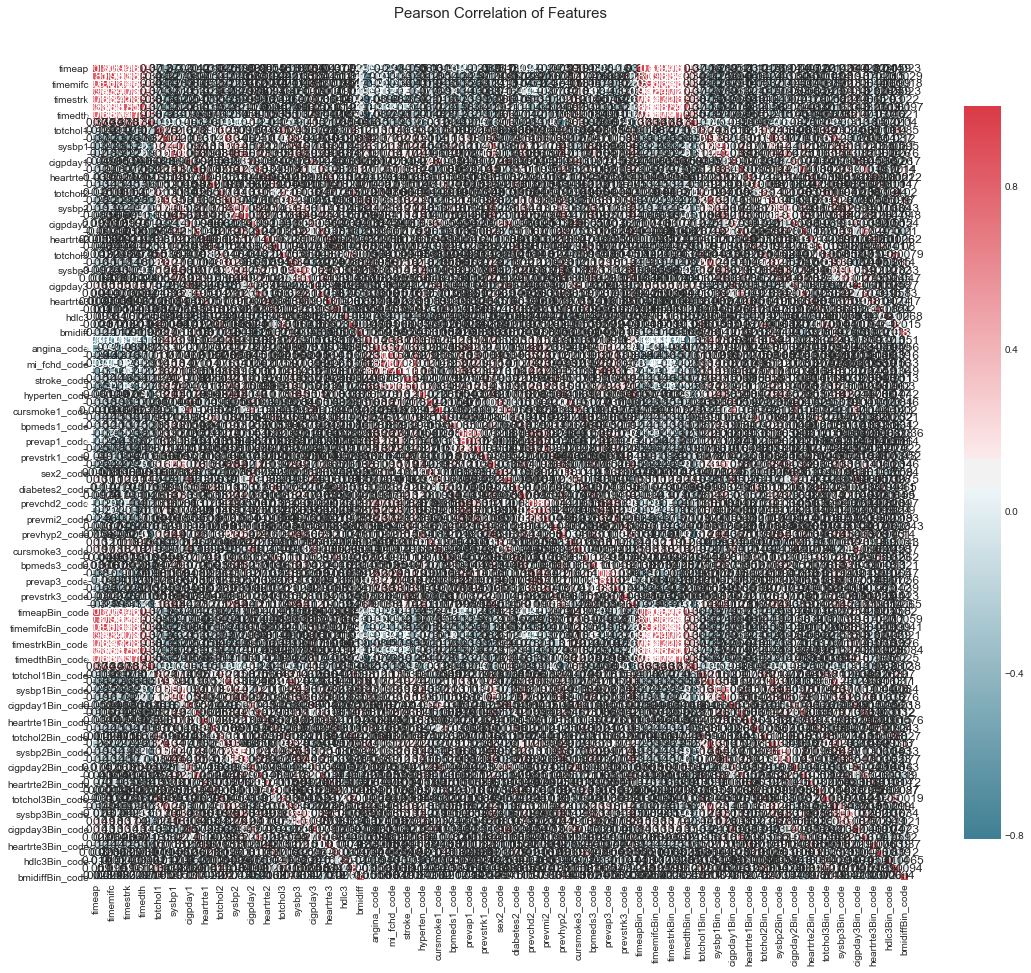

In [12]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_data_copy)

In [13]:
    #COMPARING DEM CLASSIFICATION ALGORITHMS

#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = train_data_copy[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
  MLA_name = alg.__class__.__name__
  MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
  MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
  cv_results = model_selection.cross_validate(alg, train_data_copy[train_data_copy_x_bin], train_data_copy[Target], cv  = cv_split)

  MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
  MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
  MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
  MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
  alg.fit(train_data_copy[train_data_copy_x_bin], train_data_copy[Target])
  MLA_predict[MLA_name] = alg.predict(train_data_copy[train_data_copy_x_bin])
    
  row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.999812,0.994741,0.00579049,0.895837
5,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.998722,0.993989,0.00596338,0.975923
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",1,0.993839,0.00674679,0.34863
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.99906,0.993163,0.00528116,0.216736
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.99151,0.00267641,0.0336225
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.999248,0.991435,0.00553939,0.0452596


Text(0,0.5,'Algorithm')

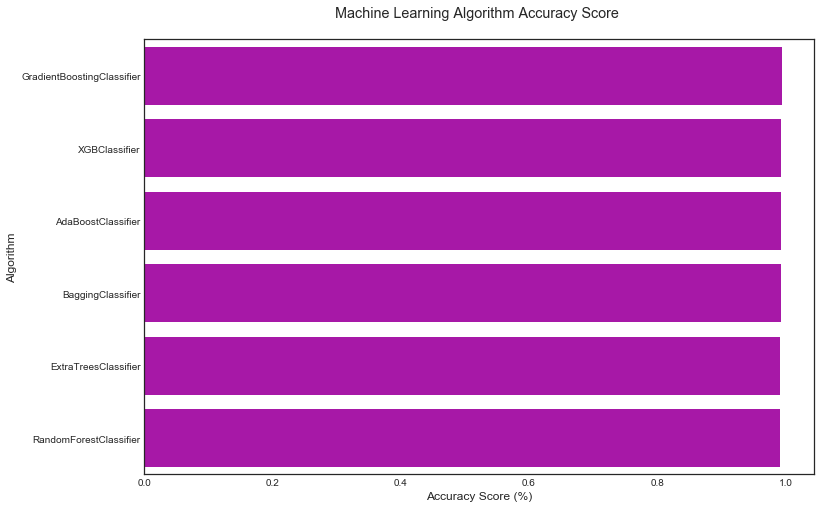

In [14]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')